In [3]:
import nltk
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import random
import pandas as pd
import pickle
import numpy as np

In [4]:
processed_script_train_lemme=pickle.load(open('processed_script_train_lemme.p','rb'))

In [5]:
processed_script_test_lemme = pickle.load(open('processed_script_test_lemme.p','rb'))

In [14]:
new_df_full =  pickle.load(open('new_df_full.p','rb'))

In [6]:
y_train = pickle.load(open('y_train.p','rb'))

In [7]:
y_test = pickle.load(open('y_test.p','rb'))

# FreqDist

In [ ]:
# use nltk's FreqDist function to count the number of occurences for each word per script

In [8]:
# training data
processed_scripts_freqdist_train_lemme = list(map(FreqDist, processed_script_train_lemme))

In [9]:
processed_scripts_freqdist_train_lemme[0]

FreqDist({'hawkeye': 348, 'heyward': 238, 'uncas': 153, 'magua': 140, 'huron': 134, 'chingachgook': 130, 'munro': 126, 'look': 101, 'cut': 90, 'hand': 88, ...})

In [10]:
# testing data
processed_scripts_freqdist_test_lemme = list(map(FreqDist, processed_script_test_lemme))

# Compile FreqDist Results into Pandas DataFrame

In [15]:
# compile both training and testing data into one data frame to subject them to the same feature engineering
# and filtering process before fitting/transforming them into models
df_lemme = pd.DataFrame(processed_scripts_freqdist_train_lemme[0], index=[0])
for i in range(1,len(processed_scripts_freqdist_train_lemme)):
    try:
        right_lemme = pd.DataFrame(processed_scripts_freqdist_train_lemme[i], index=[i])
        print(right_lemme.head(1), right_lemme.shape)
        df_lemme = pd.concat([df_lemme, right_lemme],  ignore_index=True)
        print('success')
    except:
        print('fail')
        continue
for i in range(0,len(processed_scripts_freqdist_test_lemme)):
    try:
        right_lemme = pd.DataFrame(processed_scripts_freqdist_test_lemme[i], index=[i])
        print(right_lemme.head(1), right_lemme.shape)
        df_lemme = pd.concat([df_lemme, right_lemme],  ignore_index=True)
        print('success')
    except:
        print('fail', keys_list_train[i])
        continue

   white  christmas  krasna  panama  full  shoot  rear  area  day  glass  ...  \
1      7         24       1       1    31    149     5    10   25      6  ...   

   clearly  immense  steer  beneath  sprig  onstage  completely  extreme  \
1        1        1      1        1      1        1           1        1   

   miniature  frame  
1          1      1  

[1 rows x 1840 columns] (1, 1840)


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


success
   bijou  revise  draft  october  magic  around  time  everywhere  every  \
2     60       1      1        2      7      42    55           3     16   

   thing  ...  happily  relative  term  sale  envelop  tempo  bijou's  neon  \
2     31  ...        1         1     1     1        1      1        1     1   

   chaser  illuminate  
2       1           1  

[1 rows x 2679 columns] (1, 2679)
success
   crouch  tiger  hide  dragon  hui  ling  schamus  tsai  kuo  jung  ...  \
3       1      2    11       4    1     1        1    35    1     1  ...   

   whatever  climb  reach  magic  pillow  gorge  shroud  remain  roll  cheek  
3         1      1      1      1       1      1       1       1     1      1  

[1 rows x 1566 columns] (1, 1566)
success
   write  roos  march  black  microphone  feedback  follow  v  okay   go  ...  \
4      8     1      1      4           2         1      26  8    65  108  ...   

   mine  grasshopper  unclasp  journey  share  history  celebrate  site 

success
    theory  everything  write  mccarten  shoot  script  november  predict  \
25     105         108     19         1      9       1         1        3   

    wrong  hawk  ...  implode  liquid  n  nebula  cosmic  sell  million  \
25      6    44  ...        1       1  1       1       1     1        1   

    worldwide  grandchild  credit  
25          1           1       1  

[1 rows x 2383 columns] (1, 2383)
success
    easy  write   v  first  draft  darkness  rumor  promiscuity  greatly  \
26     3      4  33     20      1         2      9            1        1   

    exaggerate  ...  derive  contemplative  duh  grandmother  ternet  \
26           2  ...       1              1    1            1       1   

    vaseline  jerk  expose  herself'  aforementioned  
26         1     1       1         1               1  

[1 rows x 2461 columns] (1, 2461)
success
    date  night  write  klausner  fade  int  bachelor  apartment  bedroom  \
27     5     28      9         1     3   46

success
    yes  man  write  stoller  base  book  first  draft  february  ext  ...  \
46  125   38     11        1     1    12     14      1         1   32  ...   

    minivan  rundown  buzzer  boisterous  delight  bend  majesty  \
46        1        1       1           1        1     1        1   

    masturbatory  feast  omar's  
46             1      1       1  

[1 rows x 2194 columns] (1, 2194)
success
    cool  write  kramer  ext  stygian  darkness  night  suggestion  travel  \
47    13      1       1   16        2         3     87           1       1   

    space  ...  guarantee  congenial  transcend  speed  helicopter  footage  \
47      3  ...          1          1          1      1           1        1   

    demolish  forever  eulogize  sinatra's  
47         1        1         1          1  

[1 rows x 2388 columns] (1, 2388)
success
    eyre  write  buffini  adapt  novel  bronte  nd  draft  th  march  ...  \
48   169     14      120    120      1       1   1      2   2

success
    shakespeare'  adapt  baz  luhrmann  shoot  script  october  ext  highway  \
67             1      1    1         1     30       1        1   99        9   

    afternoon  ...  effigy  pixilates  picture  anchor  monitor  glooming  \
67         42  ...       1          1        1       3        1         1   

    story  dialogue  recede  remind  
67      2         1       1       1  

[1 rows x 2969 columns] (1, 2969)
success
    blue  write  cianfrance  delavigne  ext  rural  suburban  street  present  \
68   105      5           1          1   48      1         5      25       55   

    day  ...  consecrate  ceremony  title  superimpose  credit  scroll  \
68   97  ...           1         1      1            1       1       1   

    series  document  marriage  witness  
68       1         1         1        1  

[1 rows x 2097 columns] (1, 2097)
success
    tin  cup  write  norville  december  draft  educational  purpose  tinny  \
69  793  749      2         1         1

success
    sister  last  credit  appear  song  end  crescendo  screen  fade  total  \
87      50    21       2      11     8   15          1      44     1      2   

    ...  when'd  respond  ironic  resilient  muscle  it'd  fondle  pregnant  \
87  ...       1        1       1          1       1     1       1         1   

    arm's  length  
87      1       1  

[1 rows x 2728 columns] (1, 2728)
success
    st  elmo'  fire  write  schumacher  kurlander  third  draft  september  \
88  80     68    78     10           1          1      1      2          2   

    title  ...  headlight  flare  image  brief  brilliance  krbo  upon  f'  \
88      2  ...          1      1      2      1           1     1     1   1   

    mo's  claton  
88     1       1  

[1 rows x 2256 columns] (1, 2256)
success
    crazy  write  watson  revise  fade  int  bedroom  apartment  day  sweet  \
89      6      5       1       1     7   94       11         25   53      3   

    ...  breakdown  psycho  enny  lea

success
     hellraiser  ii  hellbound  screenplay  atkins  original  story  barker  \
108          14   4          2           1       1         2      6       1   

     nd  draft  ...  strangle  hideously  drain  headfirst  magical  graceful  \
108   5      1  ...         1          1      1          1        1         2   

     fabulous  swivel  instantaneously  credit  
108         1       1                1       1  

[1 rows x 2613 columns] (1, 2613)
success
     interview  vampire  screenplay  produce  woolley  geffen  direct  cast  \
109          3       90           1        1        1       1       1     2   

     list  cruise  ...  veer  oncoming  regardless  truck  crush  jerk  miss  \
109     1       1  ...     1         1           1      2      1     1     1   

     inch  renew  speck  
109     1      1      1  

[1 rows x 2285 columns] (1, 2285)
success
     grabber  write  lehane  production  draft  november  pink  revise  blue  \
110      163      5       1       

success
     alien  first  draft  fade  sometime  future  space  silent  endless  \
128     49     14      1     4         1       1     21       6        1   

     shine  ...  unstrap  airstream  virtually  pastalike  stanchion  \
128      3  ...        1          1          1          1          1   

     airblast  socket  turbulent  vanilla  milkshake  
128         1       1          1        1          1  

[1 rows x 3382 columns] (1, 3382)
success
     jennifer'  body  write  diablo  int  leech  lake  women'  correctional  \
129          8    19      2       1   62      4    12       1             1   

     hospital  ...  gratefully  driver's  tonight's  blithely  lifesaver  \
129         5  ...           1         1          1         1          1   

     sputter  ironically  segue  dj's  bumper  
129        1           1      1     2       1  

[1 rows x 3029 columns] (1, 3029)
success
     c  revision  greenberg  toro  th  note  hard  copy  script  contain  ...  \
130  1   

     write  fukunaga  base  novel  studio  draft  open  rain  lash  \
149      6         1     1      1       1      1    58    10     2   

     windowpane  ...  wagoneer  vintage  pentax  arcadia's  amaze  \
149           1  ...         2        1       1          1      1   

     affectionately  bon  voyage  reminder  intersection  
149               1    1       1         1             1  

[1 rows x 2856 columns] (1, 2856)
success
     friday  th  part  viii  take  manhattan  write  hedden  fade  ext  ...  \
150       1   2     3     1    53          5      4       1     6   91  ...   

     amble  height  child  pursuer  innate  perception  grease  ruffle  \
150      1       1      1        1       1           1       1       1   

     collage  skyscraper  
150        1           1  

[1 rows x 2684 columns] (1, 2684)
success
     stir  echo  write  koepp  base  novel  matheson  march  sometimes  \
151     4     5      3      1     1      1         1      3          5   

     

success
     snap  write  july  th  fade  ext  home  night  house  dark  ...  non  \
170    48      3    24   1     4   47    16     65     10     9  ...    1   

     segment's  traditional  whereabouts  crimestoppers  local  detachment  \
170          1            1            1              1      1           1   

     eerie  theme  song  
170      1      1     1  

[1 rows x 2709 columns] (1, 2709)
success
     deep  rise  formerly  know  tentacle  sommers  kamen  extend  revision  \
171    24    30         1    45        79        1      2       2         1   

     revise  ...  beofre  inland  unknown  specie  strand  visible  jungle  \
171       1  ...       1       1        1       1       1        1       1   

     craggy  mountain  hellacious  
171       1         1           1  

[1 rows x 2466 columns] (1, 2466)
success
     evil  dead  ii  raimi  spiegel  seventh  draft  fade  de  laurentiis  \
172    50    43   5      1        1        1      1     9   1           1   


success
     return  jedi  kasdan  novel  third  draft  property  lucasfilm  ltd  \
191       9    37       1      1      1      1         1          1    1   

     completion  ...  communal  victory  liberation  hardy  other's  original  \
191           1  ...         1        1           1      1        1         1   

     adventurer  sideline  elsewhere  fade  
191           1         1          1     1  

[1 rows x 2515 columns] (1, 2515)
success
     real  ghostbusters  poultrygeist  capizzi  last  revise  act  one  fade  \
192     2            18             1        1     3       1    3   19     3   

     ext  ...  rhythm  groovin'  brown  tape  groove  know  would  disgust  \
192   21  ...       1         1      3     1       1     1      1        1   

     suffer  outfit  
192       1       1  

[1 rows x 1137 columns] (1, 1137)
success
     story  screenplay  dolman  first  draft  third  revision  november  c  \
193      1           1       1      9      1      2         

success
     imaginarium  doctor  parnassus  write  mckeown  gilliam  th  london  ext  \
214           12     145        392      3        1        1   3       3   56   

     night  ...  stall  mainly  adult  commuter  parent  purchase  expertly  \
214     35  ...      1       1      1         1       1         1         1   

     properly  nine  guarantee  
214         1     1          1  

[1 rows x 2671 columns] (1, 2671)
success
     addams  family  thompson  rewrite  rudnick  base  character  shoot  \
215      83      75         1        1        1     1          2      5   

     script  fade  ...  garment  jumper  ecstatic  embrace  silhouette  moon  \
215       1     5  ...        1       1         1        1           1     1   

     wispy  flit  cackle  firefly  
215      1     1       1        1  

[1 rows x 1650 columns] (1, 1650)
success
     lose  horizon  write  previous  hit  riskin  base  novel  fade  title  \
216    14        4     10         4    7       1     2  

success
     gremlin  write  haas  revise  ext  chinatown  street  morning  crowd  \
234      174      3     1     110   23         13      13       14     11   

     peltzer  ...  ke  ou  wfiat  ant  fearfully  bridal  imago  \
234       17  ...   1   1      1    1          1       1      1   

     seductiveness  saucily  discreetly  
234              1        1           1  

[1 rows x 3124 columns] (1, 3124)
success
     black  screen  super  new  line  cinema  present  wingnut  film  \
235     41       3      5    5     5       1        1        1     1   

     production  ...  ha  trail  ridge  oppressive  volcanic  strider'll  \
235           1  ...   1      1      1           1         1           1   

     we'll  affection  outlook  undeterred  
235      1          1        1           1  

[1 rows x 2607 columns] (1, 2607)
success
     write  macfarlane  sulkin  wellesley  wild  ext  space  x  universal  \
236      6           1       1          1     1   89      2  1     

success
     drive  angry  write  farmer  lussier  march  ext  laughter  colorado  \
257     36      9      1       1        1      1   76         6         5   

     day  ...  whatever's  bolt  loll  miraculous  horn  nah  askin  wait  \
257   92  ...           1     1     1           1     1    1      1     1   

     see  creak  
257    1      1  

[1 rows x 2023 columns] (1, 2023)
success
     pleasantville  fairytale  october  part  dream  course  look  glass  \
258             48          1        1    10      4       8   264     16   

     fade  int  ...  springer  berate  prostitute  robbins  hawk  improvement  \
258     4   80  ...         1       1           1        1     1            1   

     infomercial  j  recap  nostalgia  
258            1  1      1          1  

[1 rows x 2779 columns] (1, 2779)
success
     groundhog  day  write  second  revision  ramis  january  fade  hibernate  \
259         79   87      5      24         1      1        1     1          1   

 

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


success
   forever  write  rashida  jones  mccormack  montage  open  credit  levine'  \
1        9      5        1      1          1        5    11       1        1   

   rhino  ...  awhile  gas  station  gum  water  blatantly  gallon  restrain  \
1      3  ...       1    3        2    1      2          1       1         1   

   dog's  thirsty  
1      1        1  

[1 rows x 2168 columns] (1, 2168)
success
   script  b  window  top  location  href  there's  something  decter  j  \
2       1  4       1    2         2     2        1          1       1  1   

   strauss  farrelly  
2        1         2   (1, 12)
success
   ultimo  tango  parigi  last  paris  write  bertolucci  franco  arcalli  \
3       1     10       1     7      8      3           1       1        1   

   final  ...  roof  curl  fetal  position  corpse  alibi  rape  lunatic  \
3      1  ...     1     1      1         1       1      1     2        2   

   swell  credit  
3      1       1  

[1 rows x 1778 columns] (

success
    punch  drink  anderson  b  break  frame  script  website  abstraction  \
22      1      1         1  8      1      1       2        1            1   

    http  ...  free  notice  must  stay  entact  use  window  top  location  \
22     1  ...     1       1     1     1       1    1       1    2         2   

    href  
22     2  

[1 rows x 22 columns] (1, 22)
success
    get  marry  write  lumet  ext  halfway  house  porch  day  darkly  ...  \
23   81      5      2      1   37        4     52     18   60       1  ...   

    maroon  camry  idle  vaporize  chilly  visible  carseat  wiggle  ghost  \
23       1      1     1         1       1        1        1       1      1   

    luminous  
23         1  

[1 rows x 2468 columns] (1, 2468)
success
    ghost  ship  formerly  chimera  hanlon  first  draft  fade  int  barge  \
24      2    85         1      214       1     16      2     3  170     10   

    ...  frantically  success  bowel  perch  plane  survival  vertical  \

success
    thing  screenplay  lancaster  base  story   go  w  campbell  jr  second  \
44     47           1          1     1      1  114  1         1   1       7   

    ...  frostbitten  guardedly  suspiciously  non  chessboard  fire's  \
44  ...            1          1             1    1           1       1   

    neither  painfully  healthy  dance  
44        1          1        1      1  

[1 rows x 2434 columns] (1, 2434)
success
    hellraiser  iii  hell  earth  write  atkins  original  story  randel  st  \
45           5    1    17      5      4       2         1     15       1   1   

    ...  scour  zap  heel  weapon  nuance  respect  world's  summerskill'  \
45  ...      1    2     1       1       1        1        1             1   

    office  sophistication  
45       2               1  

[1 rows x 2527 columns] (1, 2527)
success
    misery  goldman  base  novel  fade  single  cigarette  match  hotel  ice  \
46      43        1     3      8     4       2          4     

success
    consideration  best  adapt  screenplay  boyens  base  book  j  r  tolkien  \
65              1     3      1           1       1     1     2  1  7        1   

    ...  anduril  sheath  wield  aside  bear  dimhplt  elvish  subtitle  onen  \
65  ...        1       1      1      1     1        1       1         1     1   

    edain  
65      1  

[1 rows x 1674 columns] (1, 1674)
success
    jacket  write  massy  tadjedin  base  screenplay  rocco  pure  white  \
66      49      6      1         1     1           1      1     1     18   

    screen  ...  sec  conversation  affection  awkward  nothin'  alongside  \
66      10  ...    1             1          1        1        1          1   

    modern  uninterrupted  faintly  creak  
66       1              1        1      1  

[1 rows x 2320 columns] (1, 2320)
success
    dune  seventh  draft  lynch  december  arrakis  scene  space  also  know  \
67    24        1      1      1         1       45     37     26     7    56  

In [19]:
df_lemme.shape

(348, 55948)

In [20]:
df_lemme.fillna(value=0,axis=0, inplace=True)

In [21]:
# pickle.dump(df_lemme,open('df_lemme.p','wb'))

In [22]:
df_lemme_filtered = df_lemme.copy()

In [23]:
# Remove words which occur in two out of 348 movies only
for word in df_lemme_filtered.columns[2:]:
    counts = df_lemme_filtered[word].value_counts().reset_index()
    if counts[counts['index']!=0.0][word].sum()<2:
        df_lemme_filtered.drop(word,axis=1,inplace=True)
df_lemme_filtered.head()
# This cuts the features down from 55948 to 27799

,a',a'barrel,a'commin,a'course,a'la,a'mighty,a's,aa,aaa,aaaa,...,zut,zuzu,zuzu',zuzu's,zwartz,zy,zzzips,zzzoom,zzzzt,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# pickle.dump(df_lemme_filtered,open('df_lemme_filtered_2+.p','wb'))

Dropping words that only appear in a handful of scripts. They are not going to be good features since they will have very few overlap with other movies.

|Number of movies |  Words left |
|-----------------|-------------|
|2+               |   27799     |
|3+               |   12435     |
|4+               |   11209     |
|5+               |   10251     |
|6+               |   9483      |
|7+               |   8823      |
|10+              |   8308      |
|15+              |   6476      |

In [25]:
# drop columns of the 25 most recurring words
new_df_full = pd.DataFrame(index=df_lemme_filtered.index)
for index, row in df_lemme_filtered.iterrows():
    words = row[2:].sort_values(ascending=False)[:25].index.tolist()
    for word in words:
        new_df_full[word] = df_lemme_filtered[word]
new_df_full
# new_df = pd.DataFrame(index=full_train_df_lemme_filtered['Movie_name'])
# new_df.append(full_train_df_lemme_filtered['Genre_label'])
# new_df.head()

,huron,munro,look,cut,hand,back,two,one,exterior,go,...,eric's,skank,dollar,hemingway,stein,fett,senator,yoda,speeder,windu
0,134.0,126.0,101.0,90.0,88.0,78.0,77.0,71.0,71.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,83.0,11.0,34.0,32.0,27.0,53.0,1.0,96.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,130.0,50.0,71.0,101.0,37.0,66.0,1.0,93.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,40.0,2.0,22.0,47.0,13.0,20.0,0.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,188.0,8.0,44.0,99.0,28.0,67.0,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,142.0,10.0,35.0,72.0,47.0,87.0,0.0,142.0,...,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,103.0,9.0,27.0,51.0,22.0,41.0,0.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,86.0,30.0,44.0,55.0,16.0,64.0,0.0,89.0,...,0.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
9,0.0,0.0,50.0,1.0,37.0,48.0,52.0,64.0,0.0,47.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# now there are 1220 features only which gives a ratio of 1 Sample : 4 approx. Features 
new_df_full.shape

(348, 1220)

In [27]:
# pickle.dump(new_df_full,open('new_df_full.p','wb'))

# Split Train and Test

In [15]:
# Data is split again as done orginally
X_train_df = new_df_full[0:276]

In [16]:
X_train_df

,huron,munro,look,cut,hand,back,two,one,exterior,go,...,eric's,skank,dollar,hemingway,stein,fett,senator,yoda,speeder,windu
0,134.0,126.0,101.0,90.0,88.0,78.0,77.0,71.0,71.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,83.0,11.0,34.0,32.0,27.0,53.0,1.0,96.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,130.0,50.0,71.0,101.0,37.0,66.0,1.0,93.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,40.0,2.0,22.0,47.0,13.0,20.0,0.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,188.0,8.0,44.0,99.0,28.0,67.0,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,142.0,10.0,35.0,72.0,47.0,87.0,0.0,142.0,...,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,103.0,9.0,27.0,51.0,22.0,41.0,0.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,86.0,30.0,44.0,55.0,16.0,64.0,0.0,89.0,...,0.0,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
9,0.0,0.0,50.0,1.0,37.0,48.0,52.0,64.0,0.0,47.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
len(y_train)

276

In [18]:
X_test_df = new_df_full[276:]

In [19]:
X_test_df.head()

,huron,munro,look,cut,hand,back,two,one,exterior,go,...,eric's,skank,dollar,hemingway,stein,fett,senator,yoda,speeder,windu
276,0.0,0.0,151.0,175.0,74.0,110.0,40.0,54.0,0.0,73.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
277,0.0,0.0,117.0,45.0,20.0,31.0,14.0,26.0,0.0,78.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0,0.0,50.0,49.0,28.0,60.0,7.0,24.0,0.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,0.0,0.0,70.0,11.0,22.0,42.0,21.0,50.0,0.0,89.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
len(y_test)

72

# TF-IDF

In [ ]:
# We also decided to test how TF-IDF would perform in comparision to the feature engineering done above

In [21]:
c_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [22]:
X_train_blobbed=list(map(lambda script :' '.join(script), processed_script_train_lemme))

In [23]:
X_test_blobbed=list(map(lambda script :' '.join(script), processed_script_test_lemme))

In [26]:
tf_idf_data_train = tfidf_vectorizer.fit_transform(X_train_blobbed)

In [27]:
tf_idf_data_train.shape

(276, 43851)

In [28]:
tf_idf_data_test = tfidf_vectorizer.transform(X_test_blobbed)

In [29]:
tf_idf_data_test.shape

(72, 43851)

# Modeling

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# define functions to print outputs from each model

In [65]:
def plot_feature_importance(model, x_train, n=30):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
     # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return 

In [32]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,preds,average='macro')))
    print("Recall Score: {}".format(recall_score(labels,preds,average='macro')))
    print("Accuracy Score: {}".format(accuracy_score(labels,preds)))
    print("F1 Score: {}".format(f1_score(labels,preds,average='macro')))

In [66]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = unique_labels(y_true, y_pred)
    classes = ['Romance','Horror','Fantasy']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Baseline Model

In [106]:
from sklearn.dummy import DummyClassifier

In [107]:
dummy = DummyClassifier(strategy='most_frequent')

In [108]:
dummy.fit(X_train_df,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [109]:
y_hat_test_baseline = dummy.predict(X_test_df)

In [110]:
print_metrics(y_test,y_hat_test_baseline)

Precision Score: 0.1111111111111111
Recall Score: 0.3333333333333333
Accuracy Score: 0.3333333333333333
F1 Score: 0.16666666666666666


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest Vanilla Model

In [35]:
forest_vanilla = RandomForestClassifier()
forest_vanilla.fit(X_train_df, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_hat_train_v_rf = forest_vanilla.predict(X_train_df)
y_hat_test_v_rf = forest_vanilla.predict(X_test_df)
accuracy_score(y_train, y_hat_train_v_rf), accuracy_score(y_test, y_hat_test_v_rf)

(0.927536231884058, 0.5694444444444444)

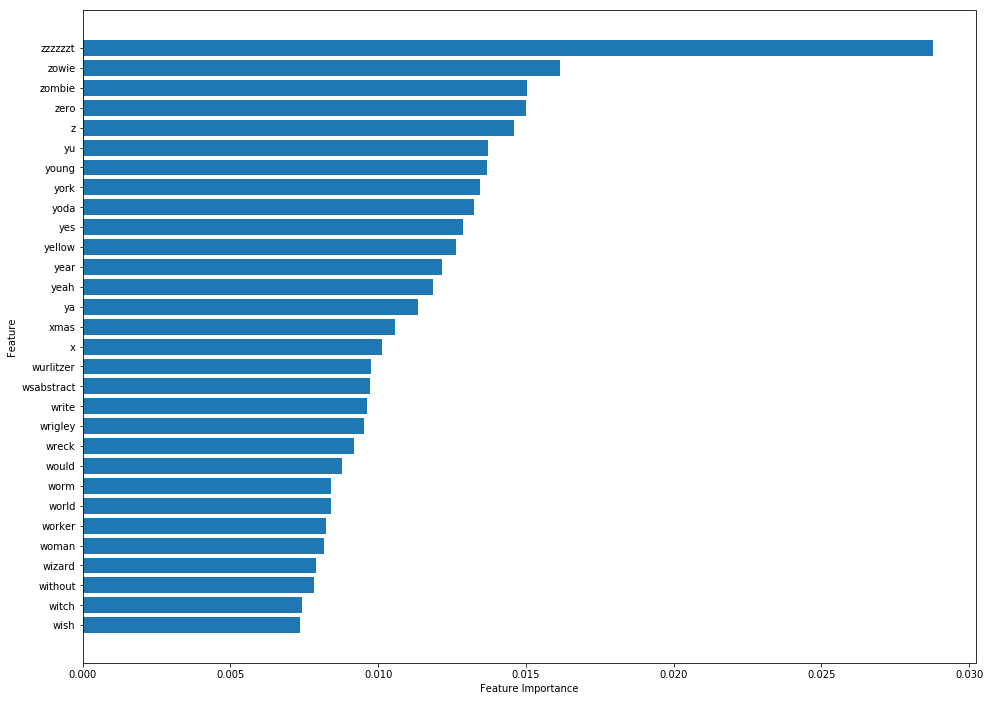

In [67]:
plot_feature_importance(forest_vanilla, X_train_df, n=30)

In [37]:
print_metrics(y_test,y_hat_test_v_rf)

Precision Score: 0.5595959595959595
Recall Score: 0.5694444444444444
Accuracy Score: 0.5694444444444444
F1 Score: 0.5524066576698156


Normalized confusion matrix


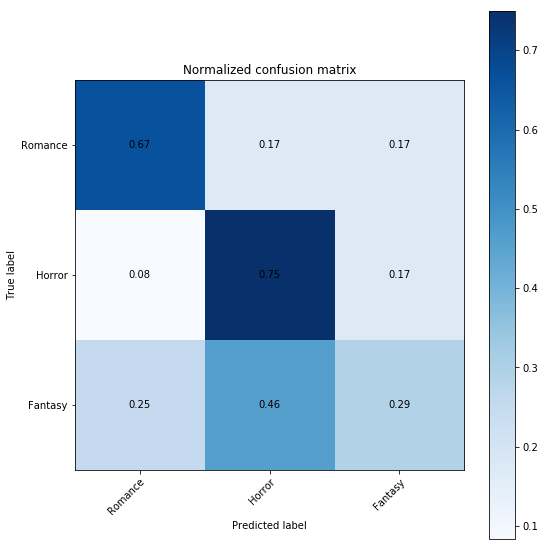

In [38]:
plot_confusion_matrix(y_test,y_hat_test_v_rf,normalize=True)

## Random Forest Optimized with GridSearch

In [39]:
param_grid_rf = {'n_estimators':[80,100,120,140],
    'criterion':['gini','entropy'],
    'max_depth':[160,180,200,220,240],
    'min_samples_split':[18,20,22,24,26]
                }

In [40]:
grid_clf = GridSearchCV(forest_vanilla, param_grid_rf, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_df, y_train)

best_parameters = grid_clf.best_params_

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
criterion: 'entropy'
max_depth: 180
min_samples_split: 26
n_estimators: 120

Training Accuracy: 85.51%
Validation accuracy: 62.5%


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [111]:
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.25
max_depth: 150
n_estimators: 140


In [112]:
y_hat_train_choc_rf = grid_clf.predict(X_train_df)
y_hat_test_choc_rf = grid_clf.predict(X_test_df)
training_accuracy = accuracy_score(y_train, y_hat_train_choc_rf)
val_accuracy = accuracy_score(y_test, y_hat_test_choc_rf)

In [113]:
print_metrics(y_test,y_hat_test_choc_rf)

Precision Score: 0.6225749559082893
Recall Score: 0.625
Accuracy Score: 0.625
F1 Score: 0.6222222222222222


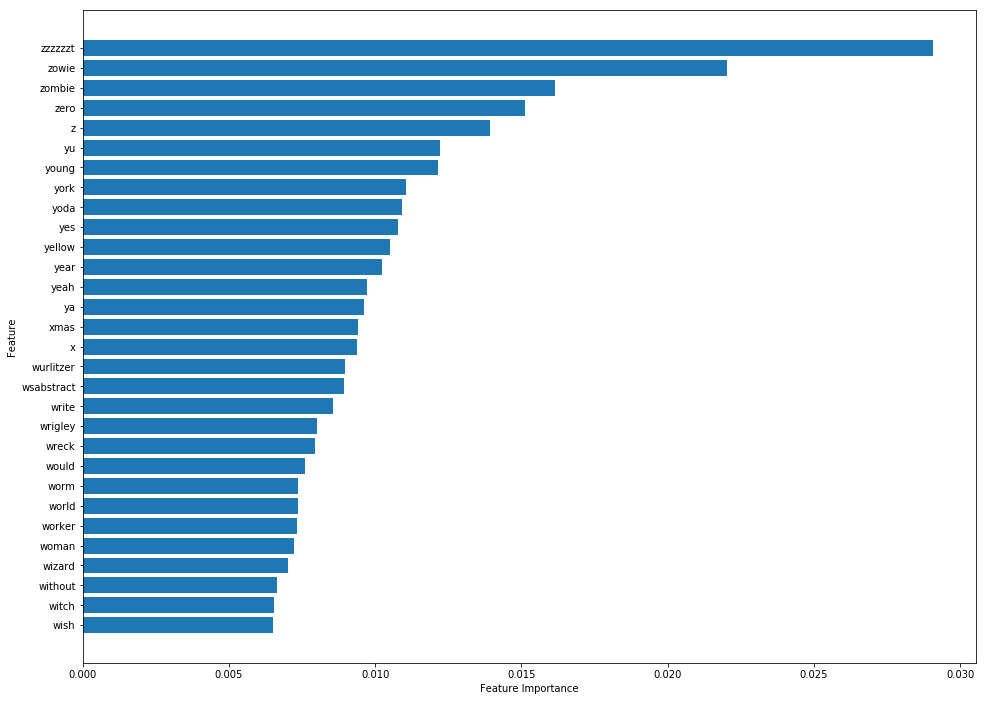

In [86]:
plot_feature_importance(RandomForestClassifier(criterion= 'entropy', max_depth= 180, min_samples_split= 26, n_estimators= 120).fit(X_train_df, y_train), X_train_df, n=30)

Normalized confusion matrix


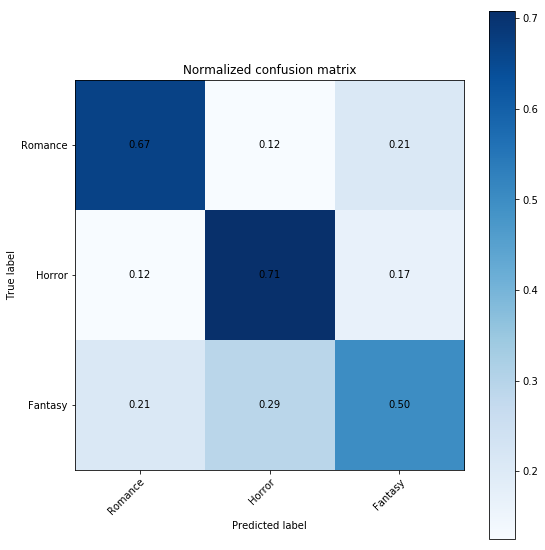

In [42]:
plot_confusion_matrix(y_test,y_hat_test_choc_rf,normalize=True)

## Random Forest Optimized with GridSearch and TF-IDF Features

In [43]:
forest_tfidif = RandomForestClassifier()
forest_tfidif.fit(tf_idf_data_train, y_train)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
y_hat_train_tfidf_rf = forest_tfidif.predict(tf_idf_data_train)
y_hat_test_tfidf_rf = forest_tfidif.predict(tf_idf_data_test)
accuracy_score(y_train, y_hat_train_tfidf_rf), accuracy_score(y_test, y_hat_test_tfidf_rf)

(0.9166666666666666, 0.5416666666666666)

In [45]:
print_metrics(y_test,y_hat_test_tfidf_rf)

Precision Score: 0.5341975308641975
Recall Score: 0.5416666666666666
Accuracy Score: 0.5416666666666666
F1 Score: 0.5359901536372126


Normalized confusion matrix


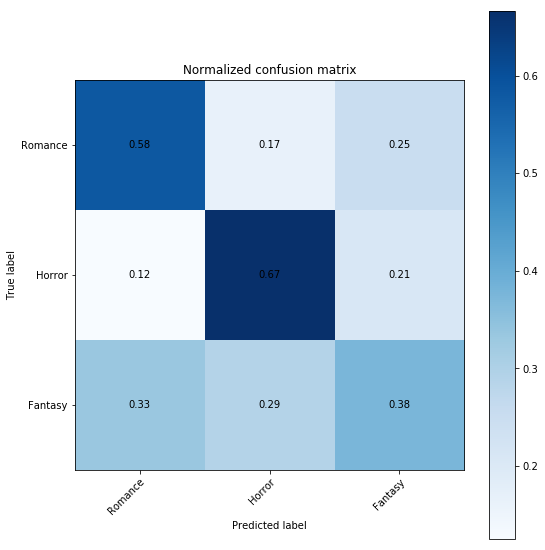

In [46]:
plot_confusion_matrix(y_test,y_hat_test_tfidf_rf,normalize=True)

In [47]:
param_grid_rf_tfidf = {'n_estimators':[80,100,120,140],
    'criterion':['gini','entropy'],
    'max_depth':[160,180,200,220,240],
    'min_samples_split':[18,20,22,24,26]
                }

In [ ]:
grid_clf_tfidf = GridSearchCV(forest_tfidif, param_grid_rf_tfidf, scoring='accuracy', cv=None, n_jobs=1)
grid_clf_tfidf.fit(tf_idf_data_train, y_train)

best_parameters = grid_clf_tfidf.best_params_

In [114]:
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.25
max_depth: 150
n_estimators: 140


In [115]:
y_hat_train_tfidf_rf = grid_clf_tfidf.predict(tf_idf_data_train)
y_hat_test_tfidf_rf = grid_clf_tfidf.predict(tf_idf_data_test)
training_accuracy = accuracy_score(y_train, y_hat_train_tfidf_rf)
val_accuracy = accuracy_score(y_test, y_hat_test_tfidf_rf)

In [116]:
print_metrics(y_test,y_hat_test_tfidf_rf)

Precision Score: 0.5965909090909091
Recall Score: 0.5833333333333334
Accuracy Score: 0.5833333333333334
F1 Score: 0.5772863568215892


Normalized confusion matrix


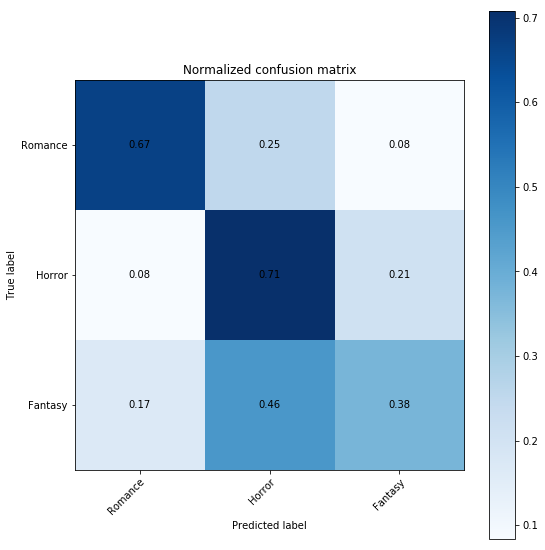

In [50]:
plot_confusion_matrix(y_test,y_hat_test_tfidf_rf,normalize=True)

## Multinomial Naive Bayes Vanilla Model

In [51]:
mnb = MultinomialNB()
mnb.fit(X_train_df,y_train)
y_hat_train_v_nb = mnb.predict(X_train_df)
y_hat_test_v_nb = mnb.predict(X_test_df)
accuracy_score(y_train, y_hat_train_v_nb), accuracy_score(y_test, y_hat_test_v_nb)

(0.8152173913043478, 0.6527777777777778)

In [52]:
print_metrics(y_test,y_hat_test_v_nb)

Precision Score: 0.6949206349206349
Recall Score: 0.6527777777777778
Accuracy Score: 0.6527777777777778
F1 Score: 0.6424664027569597


Normalized confusion matrix


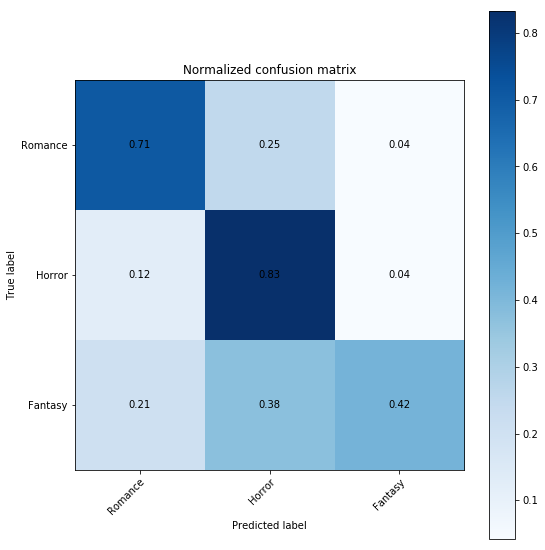

In [53]:
plot_confusion_matrix(y_test,y_hat_test_v_nb,normalize=True)

## Multinomial Naive Bayes Model Optimized with GridSearch

In [69]:
param_grid_mnb = {'alpha':[0.0,1.0],
                  'fit_prior':[True,False]
                }

In [118]:
grid_mnb_gs = GridSearchCV(MultinomialNB(), param_grid_mnb, scoring='accuracy', cv=None, n_jobs=1)
grid_mnb_gs.fit(X_train_df, y_train)

best_parameters = grid_mnb_gs.best_params_

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarni

In [119]:
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
alpha: 1.0
fit_prior: True


In [117]:
y_hat_train_mnb_gs = grid_mnb_gs.predict(X_train_df)
y_hat_test_mnb_gs = grid_mnb_gs.predict(X_test_df)
training_accuracy = accuracy_score(y_train, y_hat_train_mnb_gs)
val_accuracy = accuracy_score(y_test, y_hat_test_mnb_gs)

In [79]:
print_metrics(y_test,y_hat_test_mnb_gs)

Precision Score: 0.6949206349206349
Recall Score: 0.6527777777777778
Accuracy Score: 0.6527777777777778
F1 Score: 0.6424664027569597


Normalized confusion matrix


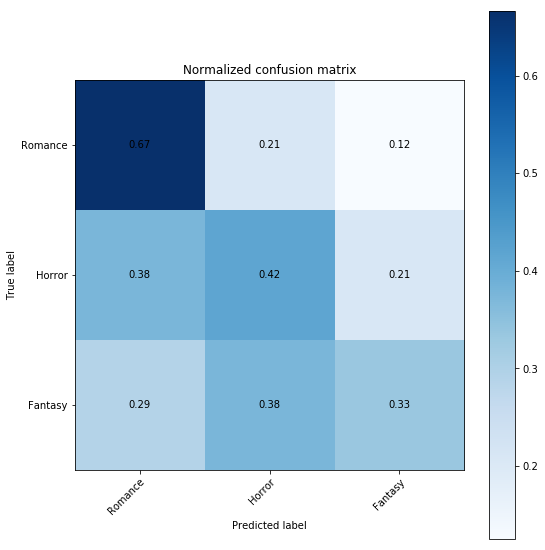

In [73]:
plot_confusion_matrix(y_test,y_hat_test_mnb_gs,normalize=True)

## Multinomial Naive Bayes Model with TF-IDF Features

In [56]:
mnb_idf = MultinomialNB()
mnb_idf.fit(tf_idf_data_train,y_train)
y_hat_train_idf_nb = mnb_idf.predict(tf_idf_data_train)
y_hat_test_idf_nb = mnb_idf.predict(tf_idf_data_test)
accuracy_score(y_train, y_hat_train_idf_nb), accuracy_score(y_test, y_hat_test_idf_nb)

(0.7934782608695652, 0.5416666666666666)

In [57]:
print_metrics(y_test,y_hat_test_idf_nb)

Precision Score: 0.5133333333333333
Recall Score: 0.5416666666666666
Accuracy Score: 0.5416666666666666
F1 Score: 0.47578529844539696


Normalized confusion matrix


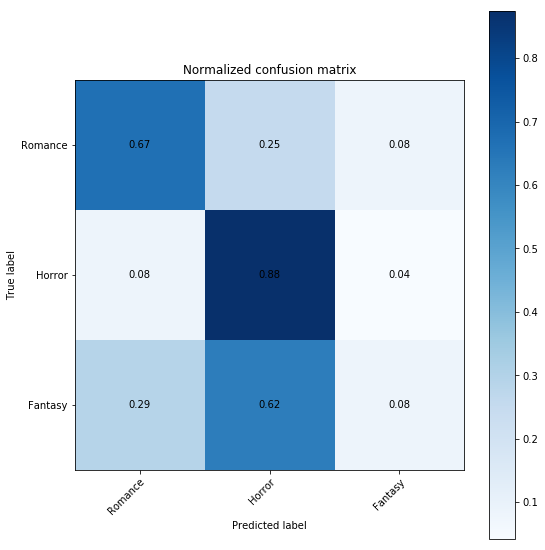

In [93]:
plot_confusion_matrix(y_test,y_hat_test_idf_nb,normalize=True)

## Multinomial Naive Bayes Model with TF-IDF Features Optimized

In [ ]:
grid_mnb_idf = GridSearchCV(MultinomialNB(), param_grid_mnb, scoring='accuracy', cv=None, n_jobs=1)
grid_mnb_idf.fit(tf_idf_data_train, y_train)

best_parameters = grid_mnb_idf.best_params_

In [121]:
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
alpha: 1.0
fit_prior: True


In [120]:
y_hat_train_mnb_idf = grid_mnb.predict(tf_idf_data_train)
y_hat_test_mnb_idf = grid_mnb.predict(tf_idf_data_test)
training_accuracy = accuracy_score(y_train, y_hat_train_mnb_idf)
val_accuracy = accuracy_score(y_test, y_hat_test_mnb_idf)

In [95]:
print_metrics(y_test,y_hat_test_mnb_idf)

Precision Score: 0.47222222222222227
Recall Score: 0.47222222222222215
Accuracy Score: 0.4722222222222222
F1 Score: 0.46269841269841266


## XGBoost Vanilla Model

In [59]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

In [60]:
boost = xgb.XGBClassifier()
boost.fit(X_train_df,y_train)
boost_train_preds = boost.predict(X_train_df)
boost_test_preds = boost.predict(X_test_df)
training_accuracy = accuracy_score(y_train,boost_train_preds)
val_accuracy = accuracy_score(y_test,boost_test_preds)

Training Accuracy: 91.3%
Validation Accuracy: 63.89%


In [62]:
print_metrics(y_test,boost_test_preds)

Precision Score: 0.6322222222222222
Recall Score: 0.638888888888889
Accuracy Score: 0.6388888888888888
F1 Score: 0.6332533013205283


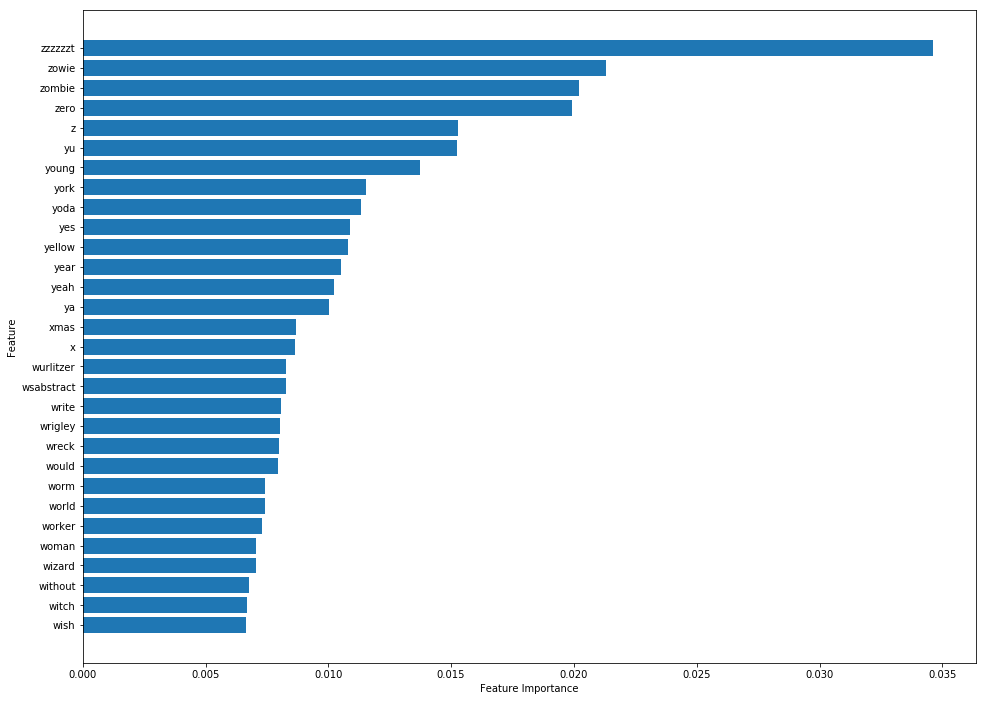

In [91]:
plot_feature_importance(boost, X_train_df, n=30)

Normalized confusion matrix


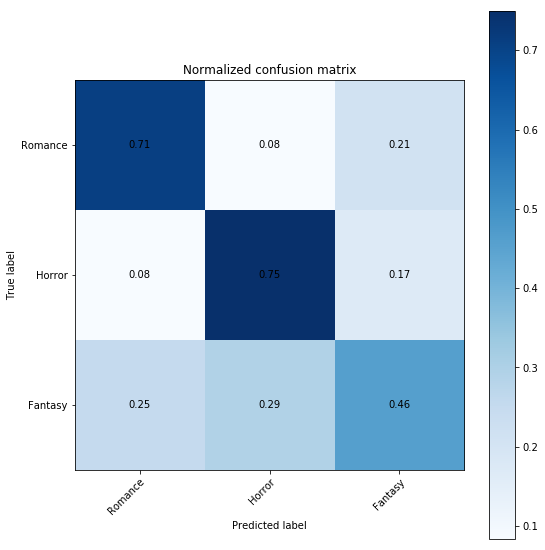

In [92]:
plot_confusion_matrix(y_test,boost_test_preds,normalize=True)

## XGBoost Optimized Model

In [97]:
boost_gs = xgb.XGBClassifier()

In [96]:
    param_grid_xgb = {'n_estimators':[100,120,140],
        'learning_rate':[0.25,0.3,0.35],
        'max_depth':[150,160,170]}

In [ ]:
grid_xgb_gs = GridSearchCV(boost_gs, param_grid_xgb, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb_gs.fit(X_train_df, y_train)

best_parameters = grid_xgb_gs.best_params_

In [104]:
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.25
max_depth: 150
n_estimators: 140


In [100]:
y_hat_train_xgb_gs = grid_xgb_gs.predict(X_train_df)
y_hat_test_xgb_gs = grid_xgb_gs.predict(X_test_df)
training_accuracy = accuracy_score(y_train, y_hat_train_xgb_gs)
val_accuracy = accuracy_score(y_test, y_hat_test_xgb_gs)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 92.75%
Validation accuracy: 62.5%


In [101]:
print_metrics(y_test,y_hat_test_xgb_gs)

Precision Score: 0.625
Recall Score: 0.6250000000000001
Accuracy Score: 0.625
F1 Score: 0.6153846153846154


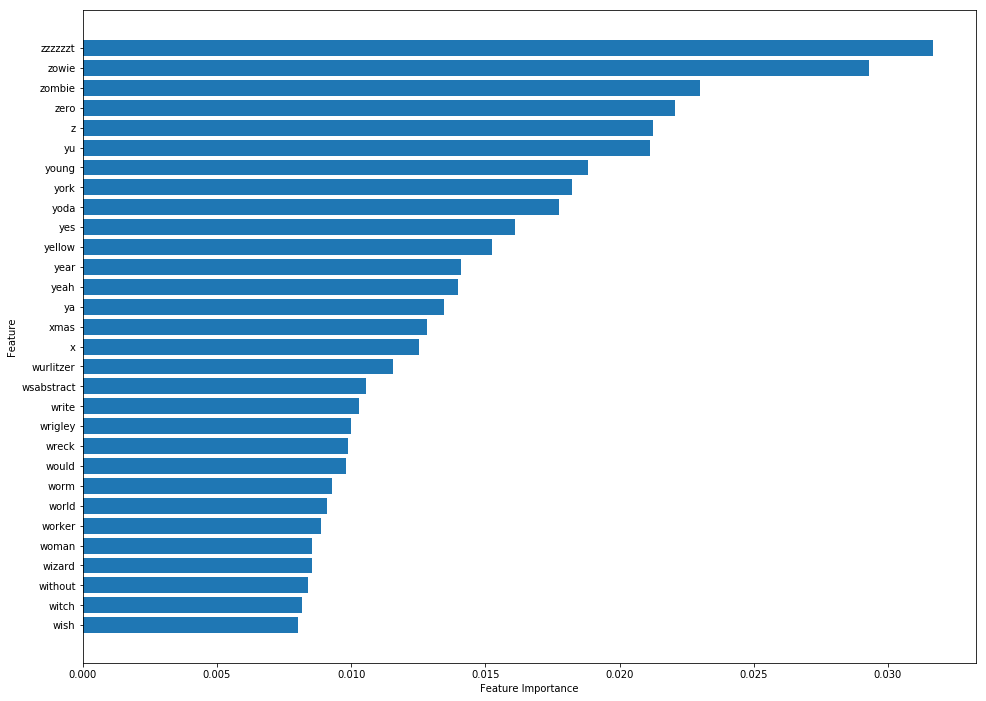

In [105]:
plot_feature_importance(xgb.XGBClassifier(n_estimators=150,learning_rate=0.25,max_depth=150).fit(X_train_df, y_train), X_train_df, n=30)

Normalized confusion matrix


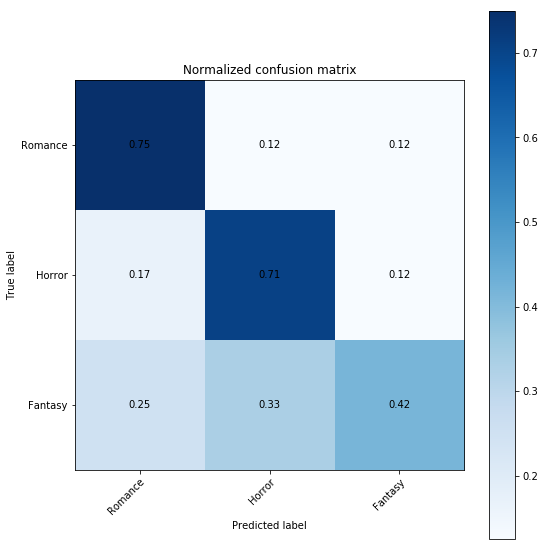

In [103]:
plot_confusion_matrix(y_test,y_hat_test_xgb_gs,normalize=True)

# Model Picked

key:
- RF: Random Forest
- MNB: Multinomial Naive Bayes
- XGB: XGBoost
- v: vanilla
- g: grid search optimized



|Model          |Accuracy       |Precision       |Recall         |F1 Score       |
|---------------|---------------|----------------|---------------|---------------|
|RF v           | 0.56          |  0.57          |  0.57         | 0.55          |
|RF g           | 0.63          |  0.63          |  0.62         | 0.62          |
|RF TF-IDF v    | 0.54          |  0.53          |  0.54         | 0.54          |
|RF TF-IDF g    | 0.58          |  0.60          |  0.58         | 0.58          |
|**MNB v**      |**0.65**       |**0.69**        |**0.65**       |**0.64**       |
|**MNB g**      |**0.65**       |**0.69**        |**0.65**       |**0.64**       |
|MNB TF-IDF v   | 0.54          |  0.51          |  0.54         | 0.48          |
|MNB TF-IDF g   | 0.47          |  0.47          |  0.47         | 0.46          |
|XGBoost v      | 0.64          |  0.63          |  0.64         | 0.63          |
|XGBoost g      | 0.63          |  0.63          |  0.63         | 0.62          |

Multinomial Naive Bayes produced the best results with around 30% more accuracy than the baseline model.